<a href="https://colab.research.google.com/github/AV-Gorshkov/Python_netology/blob/main/PY_AB_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по теме "Дисперсионный анализ и A/B-тесты"

Ниже представлено несколько блоков задач. Пожалуйста, выполните их в этом ноутбуке, загрузите в [Google Colab](https://colab.research.google.com/notebooks/welcome.ipynb?hl=ru) и предоставьте ссылку на него эксперту через Личный Кабинет.

In [1]:
# импорт библиотек

import numpy as np
import pandas as pd

import scipy.stats as st
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import f_oneway
from scipy.stats import ks_2samp
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import statsmodels.api as sm
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
import seaborn as sns

### Блок 1

##### Задание № 1
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.

In [2]:
np.random.seed(11)
A = st.norm.rvs(scale=30, loc=11, size=100)
B = A + st.norm.rvs(scale=54, loc=11, size=100)

# сформируем и проверим гипотезу:
# Н0 - результаты исследований для двух групп значимо не отличаются
# Н1 - результаты исследований для двух групп значимо отличаются

alfa = 0.05 # уровень значимости

stat, p = st.ttest_ind(A, B)

print(f"Статистика = {stat:.5f}, p = {p:.10f}")

if p > alfa:
    print('Не отклоняем нулевую гипотезу, результаты исследований для двух групп значимо не отличаются')
else:
    print('Отклоняем нулевую гипотезу, результаты исследований для двух групп значимо отличаются')

print('Группа А:')
print(f"Стандартное отклонение: {A.std():.3f}")
print(f"Среднее: {A.mean():.3f}")
print('\nГруппа B:')
print(f"Стандартное отклонение: {B.std():.3f}")
print(f"Среднее: {B.mean():.3f}")

Статистика = -1.73380, p = 0.0845100397
Не отклоняем нулевую гипотезу, результаты исследований для двух групп значимо не отличаются
Группа А:
Стандартное отклонение: 27.992
Среднее: 11.346

Группа B:
Стандартное отклонение: 57.935
Среднее: 22.557


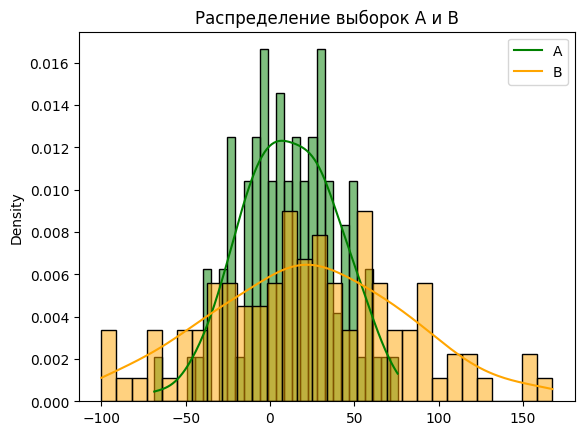

In [3]:
# визуализация

sns.histplot(data=A, kde=True, bins=30, stat="density", color='green')
sns.histplot( data=B, kde=True, bins=30, stat="density", color='orange')
plt.title("Распределение выборок А и В")
plt.legend(['A','B'])
plt.show()

##### Задание № 2
Допустим, вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы — водой с удобнением, третью группу огурцов будем поливать минералкой.
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой?
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`

In [4]:
water =   [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri =   [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral = [2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

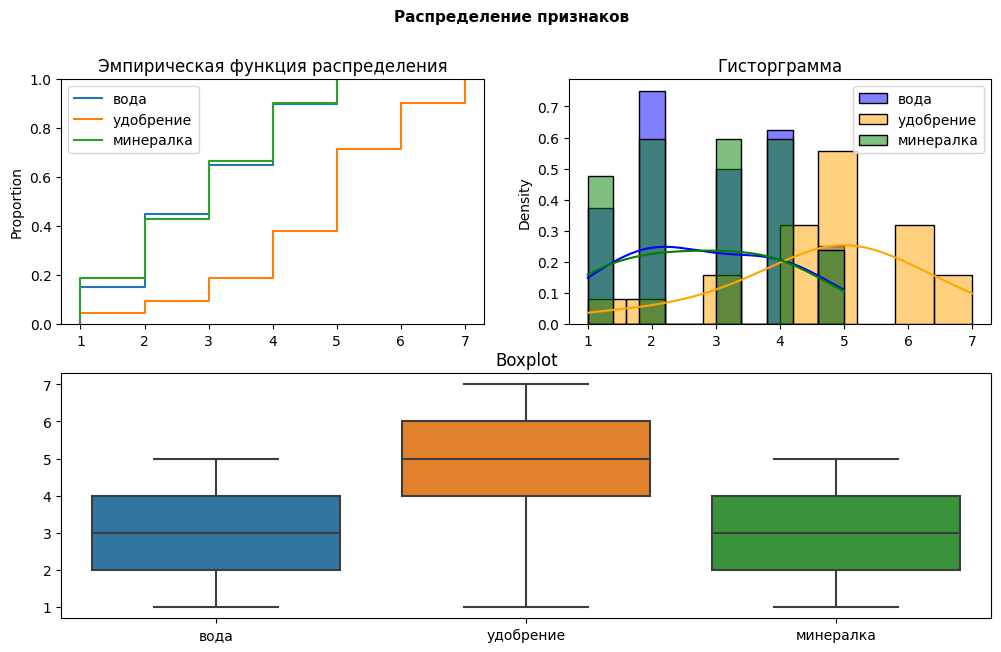

In [5]:
# визуализация

plt.figure(figsize=(12,7))
plt.suptitle('Распределение признаков', fontsize=11, fontweight='bold')

plt.subplot(2,2,1)
sns.ecdfplot(x=water, label='вода')
sns.ecdfplot(x=nutri,  label='удобрение')
sns.ecdfplot(x=mineral, label='минералка')
plt.title('Эмпирическая функция распределения')
plt.legend()

plt.subplot(2,2,2)
sns.histplot(data=water, kde=True, bins=10, stat="density", color='blue', label='вода')
sns.histplot(data=nutri, kde=True, bins=10, stat="density", color='orange', label='удобрение')
sns.histplot(data=mineral, kde=True, bins=10, stat='density', color='green',label='минералка')
plt.title('Гисторграмма')
plt.legend()

plt.subplot(2,2,(3,4))
sns.boxplot(y= water + nutri + mineral,
            x=['вода']*len(water) + ['удобрение']*len(nutri)+ ['минералка']*len(mineral)
           )
plt.title('Boxplot')

plt.show()

Визуально, можем определить:
 - различия между "минералкой" и "водой" незначительны,
  - в отличие от групп: "вода" - "удобрение" и "минералка" - " удобрение"

In [6]:
# дисперсионный анализ для нескольких выборок:

# сформируем и проверим гипотезу:
# Н0 - выборки "вода", "удобнение", "минералка" значимо не отличаются
# Н1 - выборки значимо отличаются

alfa = 0.05
f, p = st.f_oneway(water, mineral, nutri)

print(f'f={f:.5} p={p:.5}')

if p > alfa:
  print('Распределение выборок различается незначительно (не отвергаем H0)')
else:
  print('Распределение выборок сильно различается (отвергаем H0)')

f=12.526 p=2.924e-05
Распределение выборок сильно различается (отвергаем H0)


In [7]:
# Statsmodels

sizes = water + mineral + nutri
name = ['water']*len(water) + ['mineral']*len(mineral)+['nutri']*len(nutri)
df_cucumber = pd.DataFrame()
df_cucumber['sizes'] = sizes
df_cucumber['name'] = name

mod = ols('sizes ~ name', data=df_cucumber).fit()

ano_table = sm.stats.anova_lm(mod, typ=2)
print(ano_table)


              sum_sq    df          F    PR(>F)
name       46.900077   2.0  12.525963  0.000029
Residual  110.454762  59.0        NaN       NaN


In [8]:
# дисперсионный анализ для выборок "удобрение" и "минералка"

# сформируем и проверим гипотезу:
# Н0 - выборки "удобнение", "минералка" значимо не отличаются
# Н1 - выборки значимо отличаются

alfa = 0.05
f, p = st.f_oneway(mineral, nutri)
print(f'f={f:.5} p={p:.5}')

if p > alfa:
  print('Распределение выборок различается незначительно (не отвергаем H0)')
else:
  print('Распределение выборок сильно различается (отвергаем H0)')

print('\nМинералка:')
print(f"Стандартное отклонение: {A.std():.3f}")
print(f"Среднее: {A.mean():.3f}")
print('\nУдобрение:')
print(f"Стандартное отклонение: {B.std():.3f}")
print(f"Среднее: {B.mean():.3f}")


f=18.129 p=0.00012137
Распределение выборок сильно различается (отвергаем H0)

Минералка:
Стандартное отклонение: 27.992
Среднее: 11.346

Удобрение:
Стандартное отклонение: 57.935
Среднее: 22.557


In [9]:
# t-Тест Стьюдента (для выборок "удобрение" и "минералка")
alfa = 0.05 # уровень значимости

stat, p = st.ttest_ind(mineral, nutri)

print(f"Статистика = {stat:.5f}, p = {p:.10f}")

if p > alfa:
    print('Не отклоняем нулевую гипотезу, результаты выборок "минералка" и "удобрение" значимо не отличаются')
else:
    print('Отклоняем нулевую гипотезу, результаты выборок "минералка" и "удобрение" значимо отличаются')

print('1 - минералка :')
print(f"Стандартное отклонение: {np.array(mineral).std():.3f}")
print(f"Среднее: {np.array(mineral).mean():.3f}")
print('\n2 - удобрение:')
print(f"Стандартное отклонение: {np.array(nutri).std():.3f}")
print(f"Среднее: {np.array(nutri).mean():.3f}")

Статистика = -4.25778, p = 0.0001213673
Отклоняем нулевую гипотезу, результаты выборок "минералка" и "удобрение" значимо отличаются
1 - минералка :
Стандартное отклонение: 1.258
Среднее: 2.810

2 - удобрение:
Стандартное отклонение: 1.491
Среднее: 4.667


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1 group2 meandiff p-adj   lower   upper  reject
-----------------------------------------------------
mineral  nutri   1.8571 0.0001  0.8419  2.8723   True
mineral  water   0.0405 0.9951 -0.9873  1.0683  False
  nutri  water  -1.8167 0.0002 -2.8445 -0.7889   True
-----------------------------------------------------


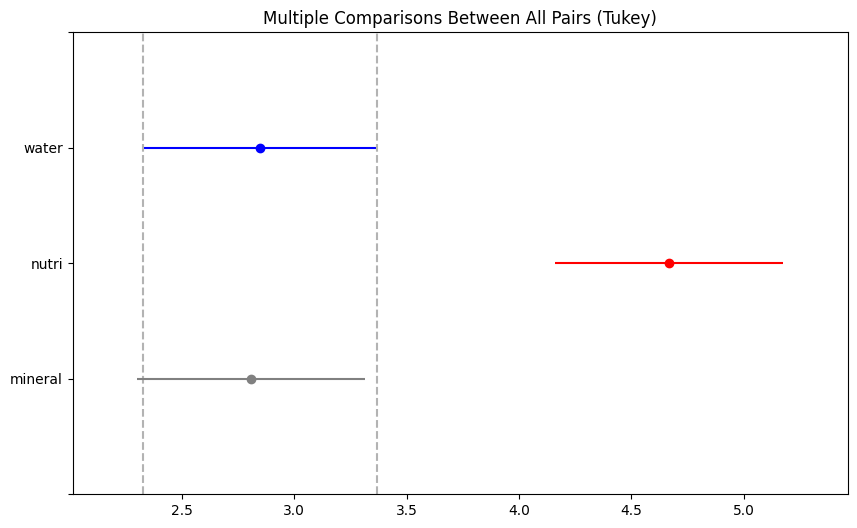

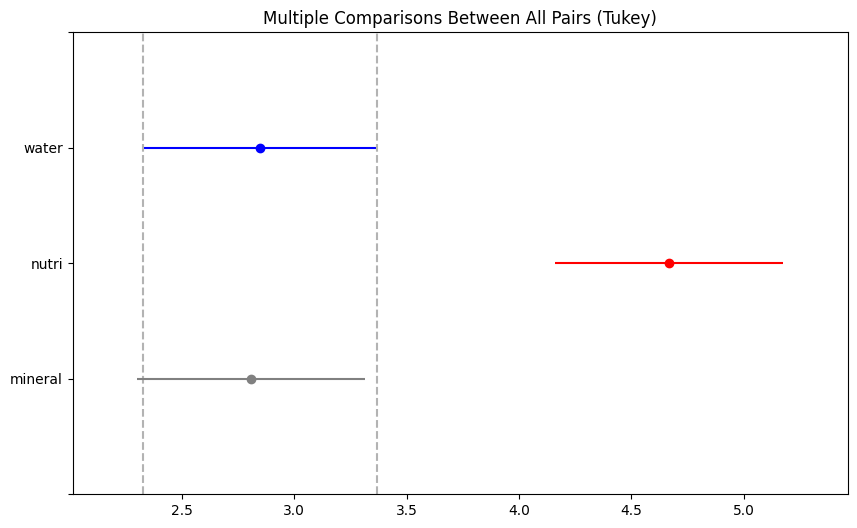

In [10]:
# тест Тьюки - попарное сравнение выборок
from statsmodels.stats.multicomp import pairwise_tukeyhsd

names =  ['water'] * len(water) + ['nutri'] * len(nutri) + ['mineral'] * len(mineral)

df1 = pd.DataFrame( np.array(water), columns=['water'] )
df2 = pd.DataFrame( np.array(nutri),columns=['nutri'] )
df3 = pd.DataFrame( np.array(mineral),columns=['mineral'] )

tukey = pairwise_tukeyhsd(endog=pd.concat( [ df1['water'], df2['nutri'], df3['mineral'] ]).values,
                          groups=names,
                          alpha=0.05)
print(tukey)

tukey.plot_simultaneous(comparison_name="water")

Вывод: Тест Тьюки показывает равенсто средних для групп "вода" и "минералка"
 - следовательно эти выборки значимо не отличаются. Выюлока "удобрение" -  значимо отличается от двух других

Вывод: использование удобрений эффективнее, чем полив минералкой. Среднее значение у группы "удобрения" почти в два раза больше чем у "минералка".

Т.к. измеряемый параметр не определен (по условию задачи), предположим:
 - урожай огурцов, от использования удобрений, повысится в среднем в два раза больше

### Блок 2
#### Cookie Cats

Cookie Cats — чрезвычайно популярная мобильная игра, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки.

По мере прохождения уровней игроки время от времени сталкиваются с воротами, которые заставляют их ждать или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота дают игрокам вынужденный перерыв в игре, что, как мы надеемся, приведёт к увеличению времени, проведённому в игре, и продлению удовольствия от игры.

<b>Но где ставить ворота? </b>
Изначально первые ворота были размещены на уровне `30`. В этом проекте вам предлагается проанализировать A/B-тест, в котором создатели переместили первые ворота в Cookie Cats с `30` уровня на уровень `40`. В частности, вам надо рассмотреть влияние A/B-теста на удержание игроков.

In [11]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

df_cats = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
df_cats.head()

<ipython-input-11-18e14440102e>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_cats = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения A/B-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.
* `version` - был ли игрок помещён в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).
* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - игрок вернулся и поиграл через 1 день после установки?
* `retention_7` - игрок вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

#### Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот.
    
**Замечание:** приведённых вспомогательных фрагментов кода не хватает для ответа на вопрос.

Делать выводы необходимо, опираясь на статистические тесты, разобранные в лекции.

Большим плюсом будет построение визуализиции для подтверждения ваших выводов. Рекомендуем использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и `matplotlib`

In [12]:
#Сгрупируем результаты теста по версиям игры.
df_cats.groupby('version')['userid'].count()

version
gate_30    44700
gate_40    45489
Name: userid, dtype: int64

In [13]:
# сформируем выборки gate_30 и  gate_40

df_v30 = df_cats[df_cats['version'] == 'gate_30']
df_v40 = df_cats[df_cats['version'] == 'gate_40']

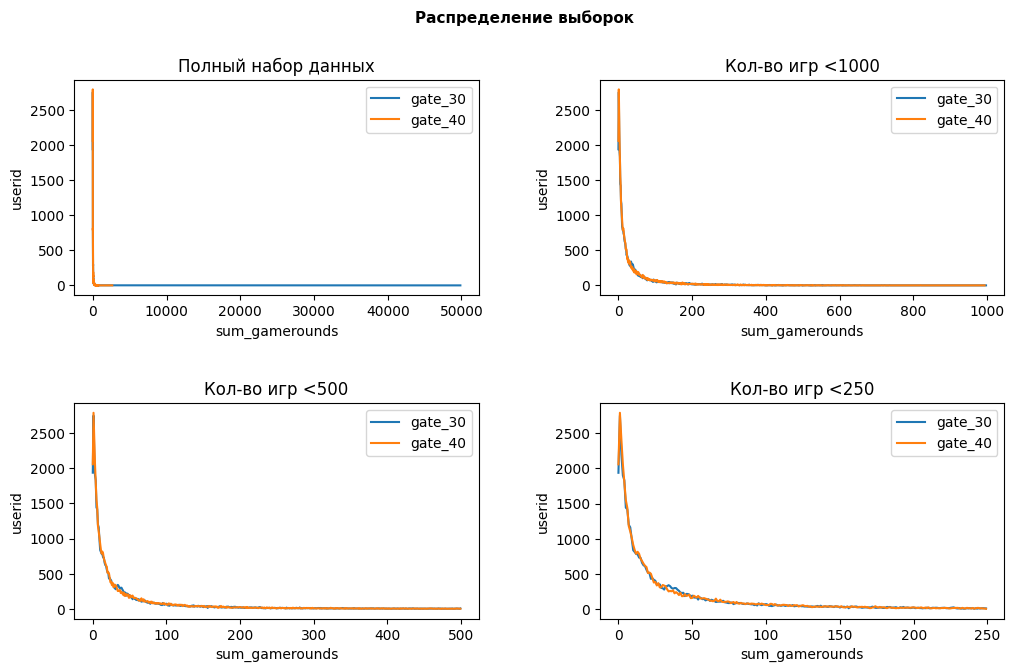

In [14]:
# визуализируем распределения выборок

v30 = df_v30.groupby('sum_gamerounds')['userid'].count().reset_index()
v40 = df_v40.groupby('sum_gamerounds')['userid'].count().reset_index()

plt.figure(figsize=(12,7))
plt.suptitle('Распределение выборок', fontsize=11, fontweight='bold')
plt.subplots_adjust(wspace= 0.3,
                    hspace=0.5)

plt.subplot(2,2,1)
sns.lineplot( data=v30,
            x='sum_gamerounds',
            y='userid',
            label='gate_30')
sns.lineplot( data=v40,
             x='sum_gamerounds',
             y='userid',
             label='gate_40')
plt.title('Полный набор данных')
plt.legend()

plt.subplot(2,2,2)
sns.lineplot( data=v30[v30['sum_gamerounds'] < 1000],
            x='sum_gamerounds',
            y='userid',
            label='gate_30')
sns.lineplot( data=v40[v40['sum_gamerounds'] < 1000],
             x='sum_gamerounds',
             y='userid',
             label='gate_40')
plt.title('Кол-во игр <1000')
plt.legend()

plt.subplot(2,2,3)
sns.lineplot( data=v30[v30['sum_gamerounds'] < 500],
            x='sum_gamerounds',
            y='userid',
            label='gate_30')
sns.lineplot( data=v40[v40['sum_gamerounds'] < 500],
             x='sum_gamerounds',
             y='userid',
             label='gate_40')
plt.title('Кол-во игр <500')
plt.legend()

plt.subplot(2,2,4)
sns.lineplot( data=v30[v30['sum_gamerounds'] < 250],
            x='sum_gamerounds',
            y='userid',
            label='gate_30')
sns.lineplot( data=v40[v40['sum_gamerounds'] < 250],
             x='sum_gamerounds',
             y='userid',
             label='gate_40')
plt.title('Кол-во игр <250')
plt.legend()

plt.show()

Из графикоы видно, что при кол-ве игр больше 250 - кол-во игроков меняется не значительно. Ограничим выборки значением в 250 игр.

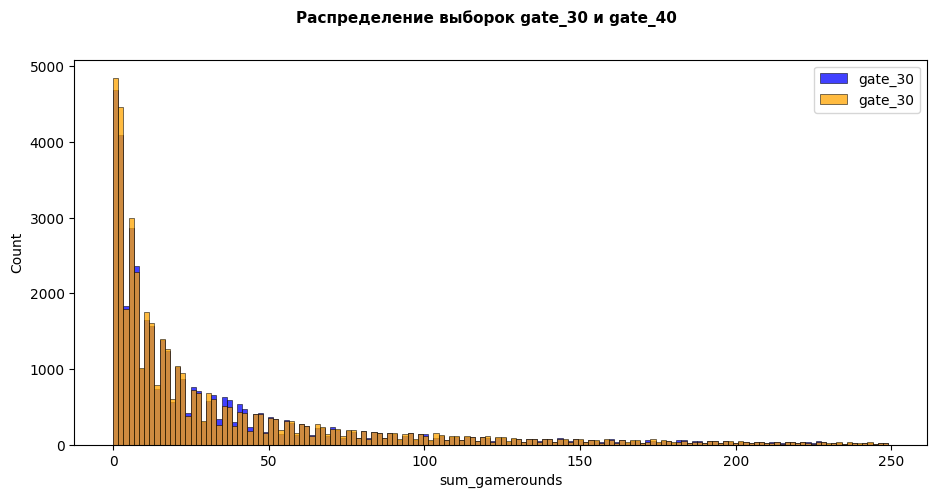

In [15]:
# гистограмма распределения

v30 = df_v30[df_v30['sum_gamerounds'] < 250]['sum_gamerounds']
v40 = df_v40[df_v40['sum_gamerounds'] < 250]['sum_gamerounds']

plt.figure(figsize=(11,5))
plt.suptitle('Распределение выборок gate_30 и gate_40', fontsize=11, fontweight='bold')

sns.histplot( data=v30,
              bins=150,
              edgecolor='black',
              color='blue',
              label='gate_30')

sns.histplot( data=v40,
              bins=150,
              edgecolor='black',
              color='orange',
              label='gate_30')
plt.legend()
plt.show()

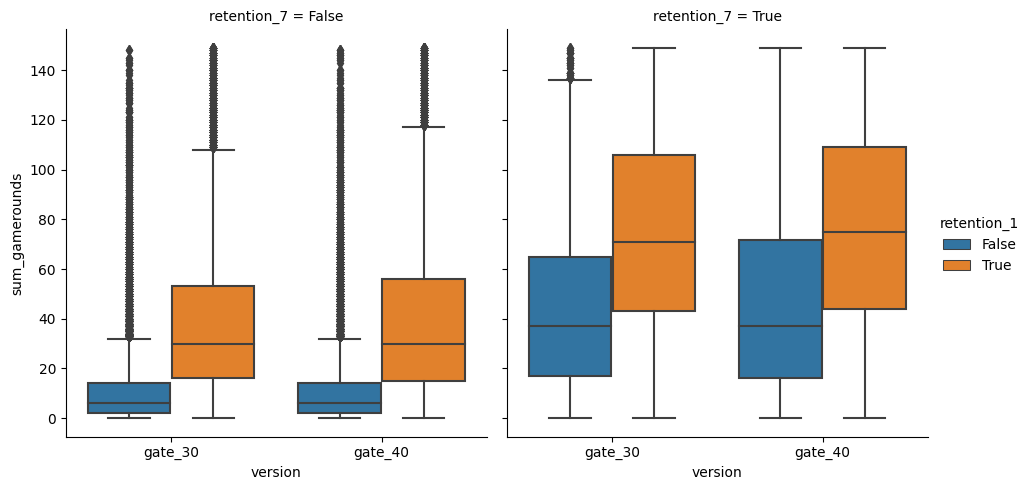

In [16]:
#  Boxplot
df_game = df_cats[df_cats['sum_gamerounds'] < 150]

sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df_game,
            kind="box",
            height=5,
            aspect=.95);


Text(0.5, 1.0, 'Плотность распределения')

<Figure size 1500x1000 with 0 Axes>

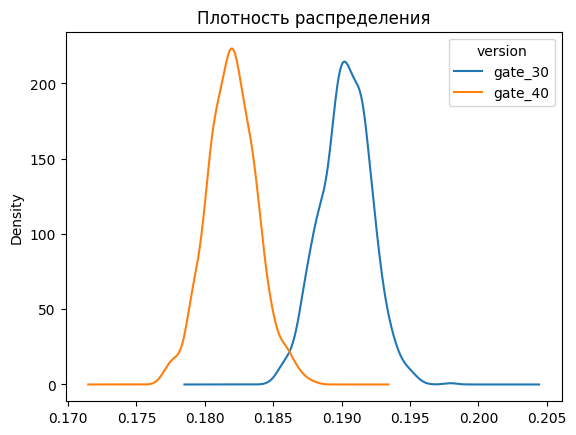

In [17]:
# визуализация различий (Применяем Bootstrap для того, чтобы более наглядно убедиться в наличии различий)
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(1000):
    boot_mean = df_cats.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()
    boot_1d.append(boot_mean)

# Преобразование списка в датафрейм

boot_1d = pd.DataFrame(boot_1d)
boot_1d.plot(kind='density')
plt.title("Плотность распределения")

In [18]:
control = df_cats[df_cats['version'] == 'gate_30']['sum_gamerounds'].values

In [19]:
# сформируем и проверим гипотезу:
# Н0 - установка ворот на уровне gate_40, менее эффективна чем на уровне gate_30 (выборки значимо не отличаются)
# Н1 - установка ворот на уровне gate_40, эффективна чем на уровне gate_30 (выборки значимо отличаются)

alfa = 0.05

control = df_cats[df_cats['version'] == 'gate_30']['sum_gamerounds'].values
test = df_cats[df_cats['version'] == 'gate_40']['sum_gamerounds'].values
# дисперсионный анализ

print('Дисперсионный анализ')
f_1, p_1 = f_oneway(control, test)

if p_1 > alfa:
  print('Размещение ворот gate_40, менее эффективна чем на уровне gate_30 (не отвергаем H0)')
else:
  print('Размещение ворот на уровне gate_30 более эффективно (отвергаем H0)')

print(f'f={f_1:.5} p={p_1:.5}')

# Т-тест Стьюдента.

print('\nТ-тест Стьюдента')
st_2, p_2 = ttest_ind(control, test)

if p_2 > alfa:
  print('Размещение ворот на уровне gate_40, менее эффективна чем на уровне gate_30 (не отвергаем H0)')
else:
  print('Размещение ворот на уровне gate_30 более эффективно (отвергаем H0)')

print(f'st={st_2:.5} p={p_2:.5}')

# U-тест Манна-Уитни.

print('\nU-тест Манна-Уитни')
st_3, p_3 = mannwhitneyu(control, test)

if p_3 > alfa:
  print('Размещение ворот на уровне gate_40, менее эффективна чем на уровне gate_30 (не отвергаем H0)')
else:
  print('Размещение ворот на уровне gate_30 более эффективно (отвергаем H0)')

print(f'st={st_3:.5} p={p_3:.5}')


# тест Колмогорова-Смирнова

print('\nтест Колмогорова-Смирнова')
st_4, p_4 = ks_2samp(control, test)

if p_4 > alfa:
  print('Размещение ворот на уровне gate_40, менее эффективна чем на уровне gate_30 (не отвергаем H0)')
else:
  print('Размещение ворот на уровне gate_30 более эффективно (отвергаем H0)')

print(f'st={st_4:.5} p={p_4:.5}')

Дисперсионный анализ
Размещение ворот gate_40, менее эффективна чем на уровне gate_30 (не отвергаем H0)
f=0.79396 p=0.37291

Т-тест Стьюдента
Размещение ворот на уровне gate_40, менее эффективна чем на уровне gate_30 (не отвергаем H0)
st=0.89104 p=0.37291

U-тест Манна-Уитни
Размещение ворот на уровне gate_40, менее эффективна чем на уровне gate_30 (не отвергаем H0)
st=1.0243e+09 p=0.050209

тест Колмогорова-Смирнова
Размещение ворот на уровне gate_30 более эффективно (отвергаем H0)
st=0.010271 p=0.01707


Вывод: Размещение ворот на уровне gate_30 более эффективна, чем на уровне gate_40

### Блок 3
#### Покемоны и A/B-тестирование

Покемоны — это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) и относятся к одному или двум так называемым классам (вода, огонь и т. д.).

Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.

**Описание набора данных**
Профессор Оук скопировал всё содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

**Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается, что они имеют одинаковую значимость.**

In [20]:
# Откроем датасет

pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)
pokemon.head()

<ipython-input-20-1e6d6fedfab1>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


**Задание № 1**
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем покемоны в классе `rock`. Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
Примечание:
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [21]:
# сформируем выборки

p_rock = pokemon[ ( (pokemon['Class 1'] == 'Rock') & (pokemon['Class 1'] != 'Grass') ) |\
                  ( (pokemon['Class 2'] == 'Rock') & (pokemon['Class 1'] != 'Grass') ) ]

p_grass = pokemon[ ( (pokemon['Class 1'] == 'Grass') & (pokemon['Class 1'] != 'Rock') ) |\
                  ( (pokemon['Class 2'] == 'Grass') & (pokemon['Class 1'] != 'Rock') ) ]

p_grass.head()
# p_rock.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
48,49,Oddish,Grass,Poison,45,50,55,75,65,30,False


In [22]:
# сформируем и проверим гипотезу:
# Н0 - Покемоны в классе grass имеют такую же Атаку (выборки одинаковы)
# Н1 - Покемоны в классе grass имеют значимо другую Атаку (выборки разные)

alfa = 0.05

# дисперсионный анализ

f, p = f_oneway( p_rock['Attack'], p_grass['Attack'])

if p > alfa:
  print('Покемоны в классе grass имеют такую же Атаку (выборки одинаковы, не отвергаем H0)')
else:
  print('Покемоны в классе grass имеют значимо другую Атаку (выборки разные, отвергаем H0)')

print(f'f={f:.5} p={p:.5}')

Покемоны в классе grass имеют значимо другую Атаку (выборки разные, отвергаем H0)
f=12.491 p=0.00054504


In [23]:
# для сравнения средних значений проведем односторонний t-Тест Стьюдента (для выборок "Grass" и "Rock")

# сформируем и проверим гипотезу:
# Н0 - Покемоны в классе grass имеют большую Атаку (среднее 1 > среднее 2)
# Н1 - Покемоны в классе grass не имеют имеют большую Атаку (среднее 1 =< среднее 2)

alfa = 0.05 # уровень значимости

stat, p = st.ttest_ind(p_grass['Attack'], p_rock['Attack'], alternative='greater')

print(f"Статистика = {stat:.5f}, p = {p:.10f}")

if p > alfa:
    print('Покемоны в классе grass имеют большую Атаку (среднее 1 > среднее 2)')
else:
    print('Покемоны в классе grass не имеют имеют большую Атаку (среднее 1 =< среднее 2)')

print('1 - Grass:')
print(f"Стандартное отклонение: {np.array(p_rock['Attack']).std():.3f}")
print(f"Среднее: {np.array(p_rock['Attack']).mean():.3f}")
print('\n2 - Rock:')
print(f"Стандартное отклонение: {np.array(p_grass['Attack']).std():.3f}")
print(f"Среднее: {np.array(p_grass['Attack']).mean():.3f}")

Статистика = -3.53424, p = 0.9997274788
Покемоны в классе grass имеют большую Атаку (среднее 1 > среднее 2)
1 - Grass:
Стандартное отклонение: 34.556
Среднее: 90.724

2 - Rock:
Стандартное отклонение: 24.049
Среднее: 73.731


<ipython-input-24-08f08ac37634>:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( boot_1d['mean_grass_attack'],
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-24-08f08ac37634>:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (a

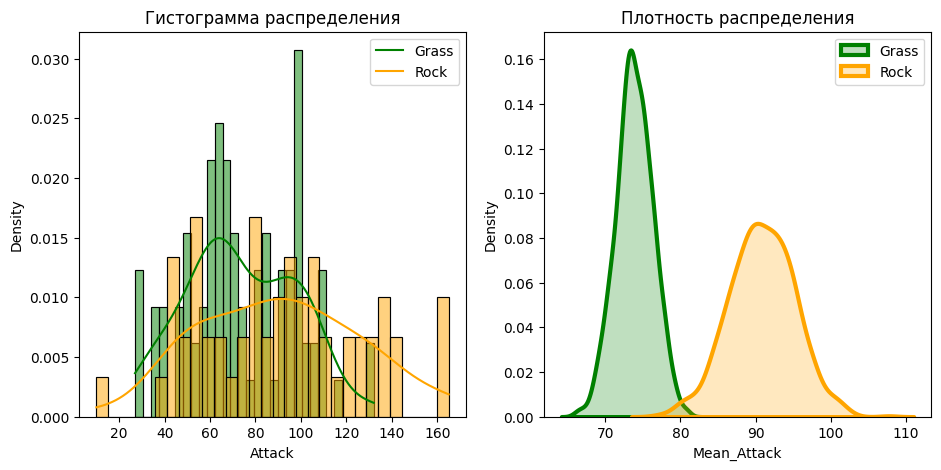

In [24]:
# визуализация

boot_1d_rock = []
boot_1d_grass = []
for i in range(1000):
    boot_mean_rock = p_rock['Attack'].sample(frac = 1, replace = True).mean()
    boot_1d_rock.append(boot_mean_rock)
    boot_mean_grass = p_grass['Attack'].sample(frac = 1, replace = True).mean()
    boot_1d_grass.append(boot_mean_grass)

boot_1d = {'mean_rock_attack': boot_1d_rock, 'mean_grass_attack': boot_1d_grass}
boot_1d = pd.DataFrame(boot_1d)

plt.figure(figsize=(11,5))

plt.subplot(1,2,1)
sns.histplot(data=p_grass['Attack'] , kde=True, bins=30, stat="density", color='green')
sns.histplot( data=p_rock['Attack'], kde=True, bins=30, stat="density", color='orange')
plt.title("Гистограмма распределения")
plt.legend(['Grass','Rock'])

plt.subplot(1,2,2)
sns.distplot( boot_1d['mean_grass_attack'],
             hist = False,
             kde = True,
             kde_kws = {'shade': True, 'linewidth': 3},
             color='green')

sns.distplot( boot_1d['mean_rock_attack'],
             hist = False,
             kde = True,
             kde_kws = {'shade': True, 'linewidth': 3},
             color='orange')
plt.xlabel('Mean_Attack')
plt.title("Плотность распределения")
plt.legend(['Grass','Rock'])

plt.show()

Вывод: Покемоны в классе Grass имеют большую Атаку, чем покемоны класс Rock (среднее 1 > среднее 2)

**Задание № 2**
    
Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос: а правда ли, что покемоны в классе `Water` в среднем быстрее покемонов в классе `Normal`.

Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание:
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [25]:
# сформируем выборки

p_water = pokemon[ ( (pokemon['Class 1'] == 'Water') & (pokemon['Class 1'] != 'Normal') ) |\
                   ( (pokemon['Class 2'] == 'Water') & (pokemon['Class 1'] != 'Normal') ) ]

p_norm = pokemon[ ( (pokemon['Class 1'] == 'Normal') & (pokemon['Class 1'] != 'Water') ) |\
                  ( (pokemon['Class 2'] == 'Normal') & (pokemon['Class 1'] != 'Water') ) ]

p_norm.head()
# p_water.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
20,21,Pidgey,Normal,Flying,40,45,40,35,35,56,False
21,22,Pidgeotto,Normal,Flying,63,60,55,50,50,71,False
22,23,Pidgeot,Normal,Flying,83,80,75,70,70,101,False
23,24,Mega Pidgeot,Normal,Flying,83,80,80,135,80,121,False
24,25,Rattata,Normal,NaN,30,56,35,25,35,72,False


In [26]:
# сформируем и проверим гипотезу:
# Н0 - Покемоны в классе water имеют такую же скорость (выборки одинаковы)
# Н1 - Покемоны в классе water имеют значимо другую скорсть (выборки разные)

alfa = 0.05

# дисперсионный анализ

f, p = f_oneway( p_water['Speed'],p_norm['Speed'])

if p > alfa:
  print('Покемоны в классе water имеют такую же скорость (выборки одинаковы, не отвергаем H0)')
else:
  print('Покемоны в классе water имеют значимо другую скорсть (выборки разные, отвергаем H0)')

print(f'f={f:.5} p={p:.5}')

Покемоны в классе water имеют значимо другую скорсть (выборки разные, отвергаем H0)
f=4.6566 p=0.031992


In [27]:
# для сравнения средних значений проведем односторонний t-Тест Стьюдента (для выборок "water" и "Normal")

# сформируем и проверим гипотезу:
# Н0 - Покемоны в классе water имеют имеют большую скорость (среднее 1 > среднее 2)
# Н1 - Покемоны в классе water имеют не имеют имеют большую скорость (среднее 1 < среднее 2)

alfa = 0.05 # уровень значимости

stat, p = st.ttest_ind(p_water['Speed'],p_norm['Speed'], alternative='greater')

print(f"Статистика = {stat:.5f}, p = {p:.10f}")

if p > alfa:
    print('Покемоны в классе water имеют имеют большую скорость (среднее 1 > среднее 2)')
else:
    print('Покемоны в классе water имеют не имеют имеют большую скорость (среднее 1 =< среднее 2)')

print('1 - Water:')
print(f"Стандартное отклонение: {np.array(p_water['Speed']).std():.3f}")
print(f"Среднее: {np.array(p_water['Speed']).mean():.3f}")
print('\n2 - Normal:')
print(f"Стандартное отклонение: {np.array(p_norm['Speed']).std():.3f}")
print(f"Среднее: {np.array(p_norm['Speed']).mean():.3f}")

Статистика = -2.15793, p = 0.9840037624
Покемоны в классе water имеют имеют большую скорость (среднее 1 > среднее 2)
1 - Water:
Стандартное отклонение: 22.658
Среднее: 64.936

2 - Normal:
Стандартное отклонение: 28.148
Среднее: 72.245


<ipython-input-28-e6913ac0b985>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( boot_2d['mean_norm_speed'],
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-28-e6913ac0b985>:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an 

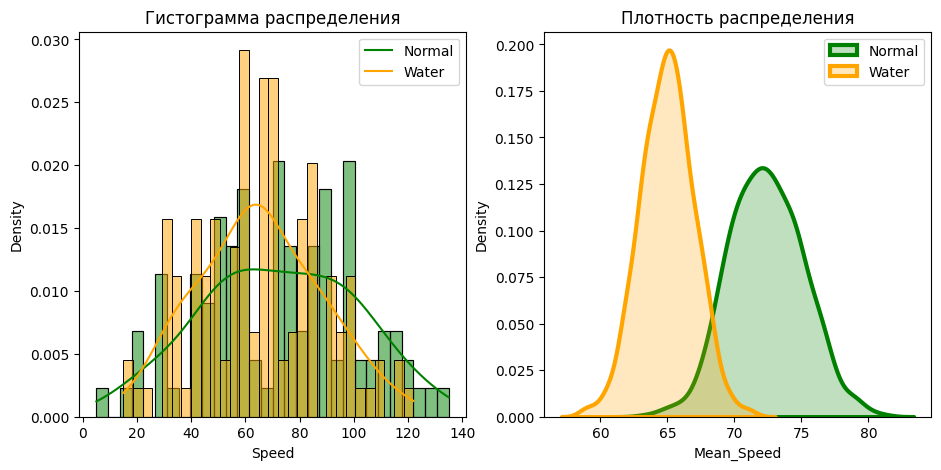

In [28]:
# визуализация

boot_water = []
boot_norm = []
for i in range(1000):
    boot_mean_water = p_water['Speed'].sample(frac = 1, replace = True).mean()
    boot_water.append(boot_mean_water)

    boot_mean_norm = p_norm['Speed'].sample(frac = 1, replace = True).mean()
    boot_norm.append(boot_mean_norm)

boot_2d = {'mean_water_speed': boot_water, 'mean_norm_speed': boot_norm}
boot_2d = pd.DataFrame(boot_2d)

plt.figure(figsize=(11,5))

plt.subplot(1,2,1)
sns.histplot( data=p_norm['Speed'], kde=True, bins=30, stat="density", color='green')
sns.histplot( data=p_water['Speed'], kde=True, bins=30, stat="density", color='orange')
plt.title("Гистограмма распределения")
plt.legend(['Normal','Water'])

plt.subplot(1,2,2)
sns.distplot( boot_2d['mean_norm_speed'],
             hist = False,
             kde = True,
             kde_kws = {'shade': True, 'linewidth': 3},
             color='green')

sns.distplot( boot_2d['mean_water_speed'],
             hist = False,
             kde = True,
             kde_kws = {'shade': True, 'linewidth': 3},
             color='orange')
plt.xlabel('Mean_Speed')
plt.title("Плотность распределения")
plt.legend(['Normal','Water'])

plt.show()

Вывод: Покемоны в классе Water имеют большую скорость чем Normal (среднее 1 > среднее 2)

**Задание № 3:**
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона.
Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку некоторым покемонам (массив `treathed_pokemon`).
Проверьте, работает ли вообще его сыворотка, и убедите всех в своем выводе статистически.
    
    
*Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.*

In [29]:
# Покемоны, которые принимали сыворотку
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']


In [31]:
# сформируем выборки

exp = pokemon[ pokemon['Name'].isin (treathed_pokemon)]
no_exp = pokemon[ ~ pokemon['Name'].isin (treathed_pokemon)]

# сформируем и проверим гипотезу:
# Н0 - Покемоны, принимавшие вакцину, не отличаются от других покемонов (выборки значимо не отличаются)
# Н1 - Покемоны, принимавшие вакцину, отличаются от других (выборки значимо отличаются)

alfa = 0.05

# дисперсионный анализ

f, p = f_oneway( exp['Speed'], no_exp['Speed'])

if p > alfa:
  print('Покемоны, принимавшие вакцину, не отличаются от других покемонов  (не отвергаем H0)')
else:
  print('Покемоны, принимавшие вакцину, отличаются от других (отвергаем H0)')

print(f'f={f:.5} p={p:.5}')

Покемоны, принимавшие вакцину, отличаются от других (отвергаем H0)
f=29.003 p=9.5151e-08


In [34]:
# для сравнения средних значений проведем односторонний t-Тест Стьюдента (для выборок: покемоны с вакциной и без вакцины)

# сформируем и проверим гипотезу:
# Н0 - Покемоны, принимавшие вакцину, быстрее других покемонов (среднее 1 > среднее 2)
# Н1 - Покемоны, принимавшие вакцину, медленней других покемонов (среднее 1 < среднее 2)

alfa = 0.05 # уровень значимости

stat, p = st.ttest_ind( no_exp['Speed'], exp['Speed'],  alternative='greater')

print(f"Статистика = {stat:.5f}, p = {p:.10f}")

if p > alfa:
    print('Покемоны, принимавшие вакцину, быстрее других покемонов (среднее 1 > среднее 2)')
else:
    print('Покемоны, принимавшие вакцину, медленней других покемонов (среднее 1 < среднее 2)')

print('1 - exp:')
print(f"Стандартное отклонение: {np.array(exp['Speed']).std():.3f}")
print(f"Среднее: {np.array(exp['Speed']).mean():.3f}")
print('\n2 - no_exp:')
print(f"Стандартное отклонение: {np.array(no_exp['Speed']).std():.3f}")
print(f"Среднее: {np.array(no_exp['Speed']).mean():.3f}")

Статистика = -5.38541, p = 0.9999999524
Покемоны, принимавшие вакцину, быстрее других покемонов (среднее 1 > среднее 2)
1 - exp:
Стандартное отклонение: 6.124
Среднее: 145.000

2 - no_exp:
Стандартное отклонение: 28.597
Среднее: 67.892


<ipython-input-206-09b6c9b7e1ee>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( boot_3d['mean_exp_speed'],
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-206-09b6c9b7e1ee>:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an

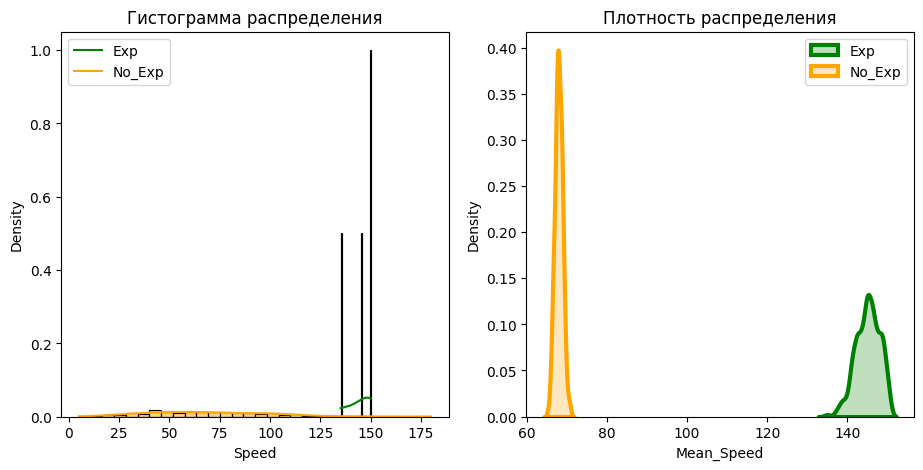

In [ ]:
# визуализация

boot_exp = []
boot_noexp = []
for i in range(1000):
    boot_mean_exp = exp['Speed'].sample(frac = 1, replace = True).mean()
    boot_exp.append(boot_mean_exp)

    boot_mean_noexp = no_exp['Speed'].sample(frac = 1, replace = True).mean()
    boot_noexp.append(boot_mean_noexp)

boot_3d = {'mean_noexp_speed': boot_noexp, 'mean_exp_speed': boot_exp}
boot_3d = pd.DataFrame(boot_3d)

plt.figure(figsize=(11,5))

plt.subplot(1,2,1)
sns.histplot( data=exp['Speed'], kde=True, bins=30, stat="density", color='green')
sns.histplot( data=no_exp['Speed'], kde=True, bins=30, stat="density", color='orange')
plt.title("Гистограмма распределения")
plt.legend(['Exp','No_Exp'])

plt.subplot(1,2,2)
sns.distplot( boot_3d['mean_exp_speed'],
             hist = False,
             kde = True,
             kde_kws = {'shade': True, 'linewidth': 3},
             color='green')

sns.distplot( boot_3d['mean_noexp_speed'],
             hist = False,
             kde = True,
             kde_kws = {'shade': True, 'linewidth': 3},
             color='orange')
plt.xlabel('Mean_Speed')
plt.title("Плотность распределения")
plt.legend(['Exp','No_Exp'])

plt.show()

Вывод:
- Дисперсионный анализ: значимые различия между экпериментными покемонами и остальными (выбокри разные).
- Односторонний t-Тест Стьюдента: Покемоны, которые участвовали в экперименте, не стали быстре остальных.

**Задание № 4**
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов.
Оук предложил разобраться в этом Вам.

Действительно ли сумма характеристик `HP`, `Attack`, `Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?

Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

In [ ]:
# добавим новые характеристики покемонам

pokemon['sp_summ'] = pokemon['HP'] + pokemon['Attack'] + pokemon['Defense']
pokemon['sp_multi'] = pokemon['HP'] * pokemon['Attack'] * pokemon['Defense']

pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,sp_summ,sp_multi
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,143,108045
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,185,234360
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,245,544480
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,303,984000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,134,87204


Характеристики легендарных покемонов, значимо отличаются (отвергаем H0)
f=134.37 p=7.9709e-29


<ipython-input-208-1f04fa197421>:46: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( boot_4d['mean_legend_sum'],
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-208-1f04fa197421>:52: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (a

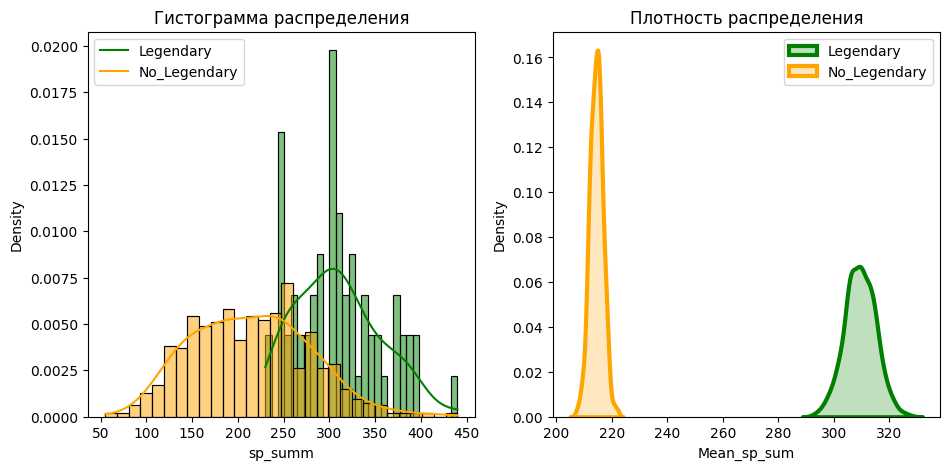

In [ ]:
# сформируем выборки

legend = pokemon[ pokemon['Legendary'] == True]
no_legend = pokemon[  pokemon['Legendary'] == False]

# сформируем и проверим гипотезу:
# Н0 - Характеристика покемонов sp_summ, значимо не различаются (выборки значимо не отличаются)
# Н1 - Характеристика sp_summ легендарных покемонов, значимо отличаются(выборки значимо отличаются)

alfa = 0.05

# дисперсионный анализ

f, p = f_oneway( legend['sp_summ'], no_legend['sp_summ'])

if p > alfa:
  print('Характеристики покемонов, значимо не различаются (не отвергаем H0)')
else:
  print('Характеристики легендарных покемонов, значимо отличаются (отвергаем H0)')

print(f'f={f:.5} p={p:.5}')

# визуализация

boot_legend_sum = []
boot_no_legend_sum = []
for i in range(1000):
    boot_mean_legend_sum = legend['sp_summ'].sample(frac = 1, replace = True).mean()
    boot_legend_sum.append(boot_mean_legend_sum )

    boot_mean_no_legend_sum = no_legend['sp_summ'].sample(frac = 1, replace = True).mean()
    boot_no_legend_sum.append(boot_mean_no_legend_sum)

boot_4d = {'mean_no_legend_sum': boot_no_legend_sum, 'mean_legend_sum': boot_legend_sum}
boot_4d = pd.DataFrame(boot_4d)

plt.figure(figsize=(11,5))

plt.subplot(1,2,1)
sns.histplot( data=legend['sp_summ'], kde=True, bins=30, stat="density", color='green')
sns.histplot( data=no_legend['sp_summ'], kde=True, bins=30, stat="density", color='orange')
plt.title("Гистограмма распределения")
plt.legend(['Legendary','No_Legendary'])

plt.subplot(1,2,2)
sns.distplot( boot_4d['mean_legend_sum'],
             hist = False,
             kde = True,
             kde_kws = {'shade': True, 'linewidth': 3},
             color='green')

sns.distplot( boot_4d['mean_no_legend_sum'],
             hist = False,
             kde = True,
             kde_kws = {'shade': True, 'linewidth': 3},
             color='orange')
plt.xlabel('Mean_sp_sum')
plt.title("Плотность распределения")
plt.legend(['Legendary','No_Legendary'])

plt.show()

In [ ]:
# для сравнения средних значений проведем односторонний t-Тест Стьюдента (для выборок: сумма характеристик у легендарных покемонов и всех остальных)

# сформируем и проверим гипотезу:
# Н0 - Характеристики легендарных покемонов выше (среднее 1 > среднее 2)
# Н1 - Характеристики легендарных покемонов ниже (среднее 1 < среднее 2)

alfa = 0.05 # уровень значимости

stat, p = st.ttest_ind( legend['sp_summ'], no_legend['sp_summ'], alternative='greater')

print(f"Статистика = {stat:.5f}, p = {p:.10f}")

if p > alfa:
    print('Характеристики легендарных покемонов выше (среднее 1 > среднее 2)')
else:
    print('Характеристики легендарных покемонов ниже (среднее 1 < среднее 2)')

print('1 - Legend:')
print(f"Стандартное отклонение: {np.array(legend['sp_summ']).std():.3f}")
print(f"Среднее: {np.array(legend['sp_summ']).mean():.3f}")
print('\n2 - no_Lgend:')
print(f"Стандартное отклонение: {np.array(no_legend['sp_summ']).std():.3f}")
print(f"Среднее: {np.array(no_legend['sp_summ']).mean():.3f}")

Статистика = 11.59185, p = 0.0000000000
Характеристики легендарных покемонов ниже (среднее 1 < среднее 2)
1 - Legend:
Стандартное отклонение: 46.071
Среднее: 309.077

2 - no_Lgend:
Стандартное отклонение: 64.316
Среднее: 214.411


Вывод: Сумма характеристик у легендарных значительно ниже, чем у остальных (среднее 1 < среднее 2)

Характеристики легендарных покемонов, значимо отличаются (отвергаем H0)
f=175.91 p=1.9927e-36


<ipython-input-210-b9e522540e7b>:41: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( boot_5d['mean_legend_multi'],
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-210-b9e522540e7b>:47: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` 

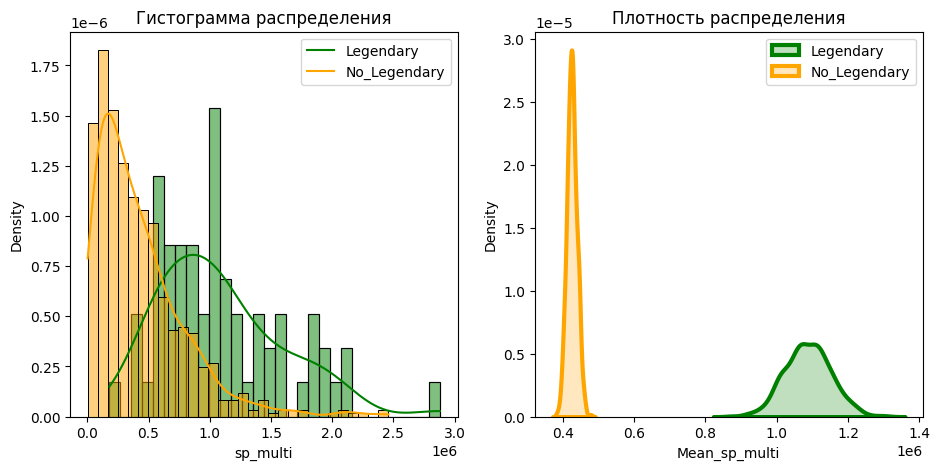

In [ ]:
# сформируем и проверим гипотезу:
# Н0 - Характеристика покемонов p_multi, значимо не различаются (выборки значимо не отличаются)
# Н1 - Характеристика sp_multi легендарных покемонов, значимо отличаются(выборки значимо отличаются)

alfa = 0.05

# дисперсионный анализ

f, p = f_oneway( legend['sp_multi'], no_legend['sp_multi'])

if p > alfa:
  print('Характеристики покемонов, значимо не различаются (не отвергаем H0)')
else:
  print('Характеристики легендарных покемонов, значимо отличаются (отвергаем H0)')

print(f'f={f:.5} p={p:.5}')

# визуализация

boot_legend_multi = []
boot_no_legend_multi = []
for i in range(1000):
    boot_mean_legend_multi = legend['sp_multi'].sample(frac = 1, replace = True).mean()
    boot_legend_multi.append(boot_mean_legend_multi )

    boot_mean_no_legend_multi = no_legend['sp_multi'].sample(frac = 1, replace = True).mean()
    boot_no_legend_multi.append(boot_mean_no_legend_multi)

boot_5d = {'mean_no_legend_multi': boot_no_legend_multi, 'mean_legend_multi': boot_legend_multi}
boot_5d = pd.DataFrame(boot_5d)

plt.figure(figsize=(11,5))

plt.subplot(1,2,1)
sns.histplot( data=legend['sp_multi'], kde=True, bins=30, stat="density", color='green')
sns.histplot( data=no_legend['sp_multi'], kde=True, bins=30, stat="density", color='orange')
plt.title("Гистограмма распределения")
plt.legend(['Legendary','No_Legendary'])

plt.subplot(1,2,2)
sns.distplot( boot_5d['mean_legend_multi'],
             hist = False,
             kde = True,
             kde_kws = {'shade': True, 'linewidth': 3},
             color='green')

sns.distplot( boot_5d['mean_no_legend_multi'],
             hist = False,
             kde = True,
             kde_kws = {'shade': True, 'linewidth': 3},
             color='orange')
plt.xlabel('Mean_sp_multi')
plt.title("Плотность распределения")
plt.legend(['Legendary','No_Legendary'])

plt.show()

In [ ]:
# для сравнения средних значений проведем односторонний t-Тест Стьюдента (для выборок: multi-характеристика у легендарных покемонов и всех остальных)

# сформируем и проверим гипотезу:
# Н0 - Характеристики легендарных покемонов выше (среднее 1 > среднее 2)
# Н1 - Характеристики легендарных покемонов ниже (среднее 1 < среднее 2)

alfa = 0.05 # уровень значимости

stat, p = st.ttest_ind( legend['sp_multi'], no_legend['sp_multi'], alternative='greater')

print(f"Статистика = {stat:.5f}, p = {p:.10f}")

if p > alfa:
    print('Характеристики легендарных покемонов выше (среднее 1 > среднее 2)')
else:
    print('Характеристики легендарных покемонов ниже (среднее 1 < среднее 2)')

print('1 - Legend:')
print(f"Стандартное отклонение: {np.array(legend['sp_multi']).std():.3f}")
print(f"Среднее: {np.array(legend['sp_multi']).mean():.3f}")
print('\n2 - no_Lgend:')
print(f"Стандартное отклонение: {np.array(no_legend['sp_multi']).std():.3f}")
print(f"Среднее: {np.array(no_legend['sp_multi']).mean():.3f}")

Статистика = 13.26325, p = 0.0000000000
Характеристики легендарных покемонов ниже (среднее 1 < среднее 2)
1 - Legend:
Стандартное отклонение: 512998.795
Среднее: 1085941.615

2 - no_Lgend:
Стандартное отклонение: 371101.468
Среднее: 425041.389


Вывод: Произведение характеристик у легендарных покемонов ниже (среднее 1 < среднее 2)

**Задание № 5**
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса (массив `best_defence_class`), которые на его взгляд одинаковы по "силе обычной защиты" `Defense`.

Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо. Все та же статистика Вам в помощь!

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

In [ ]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']

In [ ]:
# сформируем выборки

rock = pokemon[ (pokemon['Class 1'] == 'Rock') | (pokemon['Class 2'] == 'Rock')]
ground = pokemon[ (pokemon['Class 1'] == 'Ground') | (pokemon['Class 2'] == 'Ground')]
steel = pokemon[ (pokemon['Class 1'] == 'Steel') | (pokemon['Class 2'] == 'Steel')]
ice = pokemon[ (pokemon['Class 1'] == 'Ice') | (pokemon['Class 2'] == 'Ice')]

# сформируем и проверим гипотезу:
# Н0 - Характеристика Defense у покемонов из группы, значимо не различается (выборки значимо не отличаются)
# Н1 - Характеристика Defense у покемонов из группы, значимо отличается (выборки значимо отличаются)

alfa = 0.05

# дисперсионный анализ

f, p = f_oneway( rock['Defense'], ground['Defense'],  steel['Defense'], ice['Defense'])

if p > alfa:
  print('Характеристика Defense у покемонов из группы, значимо не различается (не отвергаем H0)')
else:
  print('Характеристика Defense у покемонов из группы, значимо отличается (отвергаем H0)')

print(f'f={f:.5} p={p:.5}')

Характеристика Defense у покемонов из группы, значимо отличается (отвергаем H0)
f=10.82 p=1.2315e-06


<ipython-input-214-d94887001d74>:35: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( boot_5d['Rock'],
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-214-d94887001d74>:40: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-leve

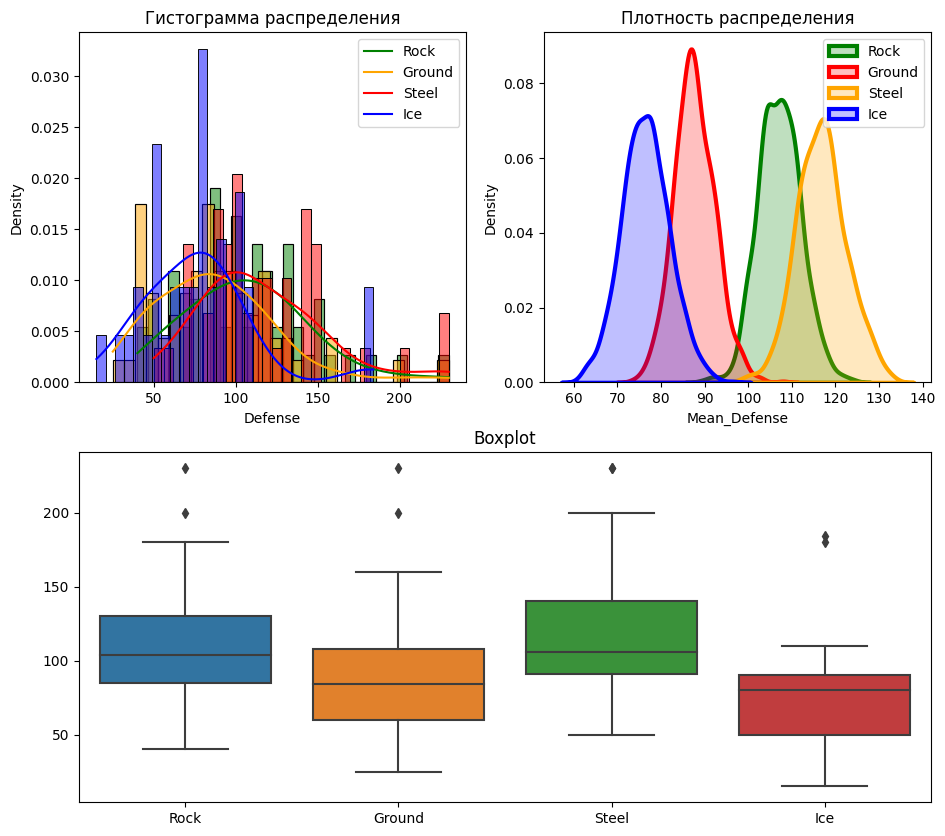

In [ ]:
# визуализация

boot_5d = {}
lst_size = []
lst_kind = []

for name in best_defence_class:

  lst_defense = []
  df = pokemon[ (pokemon['Class 1'] == name ) | (pokemon['Class 2'] == name )]

  _lst = list( df['Defense'] )
  lst_size += _lst
  lst_kind += [name] * len(df['Defense'])

  for i in range(1000):

      boot_mean = df['Defense'].sample(frac = 1, replace = True).mean()
      lst_defense.append(boot_mean )

  boot_5d[name] = lst_defense
boot_5d = pd.DataFrame(boot_5d)

plt.figure(figsize=(11,10))

plt.subplot(2,2,1)
sns.histplot( data=rock['Defense'], kde=True, bins=30, stat="density", color='green')
sns.histplot( data=ground['Defense'], kde=True, bins=30, stat="density", color='orange')
sns.histplot( data=steel['Defense'], kde=True, bins=30, stat="density", color='red')
sns.histplot( data=ice['Defense'], kde=True, bins=30, stat="density", color='blue')
plt.title("Гистограмма распределения")
plt.legend(best_defence_class)

plt.subplot(2,2,2)
sns.distplot( boot_5d['Rock'],
             hist = False,
             kde = True,
             kde_kws = {'shade': True, 'linewidth': 3},
             color='green')
sns.distplot( boot_5d['Ground'],
             hist = False,
             kde = True,
             kde_kws = {'shade': True, 'linewidth': 3},
             color='red')
sns.distplot( boot_5d['Steel'],
             hist = False,
             kde = True,
             kde_kws = {'shade': True, 'linewidth': 3},
             color='orange')
sns.distplot( boot_5d['Ice'],
             hist = False,
             kde = True,
             kde_kws = {'shade': True, 'linewidth': 3},
             color='blue')
plt.xlabel('Mean_Defense')
plt.title("Плотность распределения")
plt.legend(best_defence_class)

plt.subplot(2,2,(3,4))
sns.boxplot( y=lst_size,
             x=lst_kind
           )
plt.title('Boxplot')

plt.show()

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
Ground    Ice -11.0436 0.4746 -30.8773  8.7901  False
Ground   Rock  19.3847 0.0235   1.8684  36.901   True
Ground  Steel  28.9108 0.0004  10.5525  47.269   True
   Ice   Rock  30.4283 0.0008  10.0453 50.8113   True
   Ice  Steel  39.9544    0.0  18.8434 61.0653   True
  Rock  Steel    9.526 0.5627  -9.4244 28.4764  False
-----------------------------------------------------


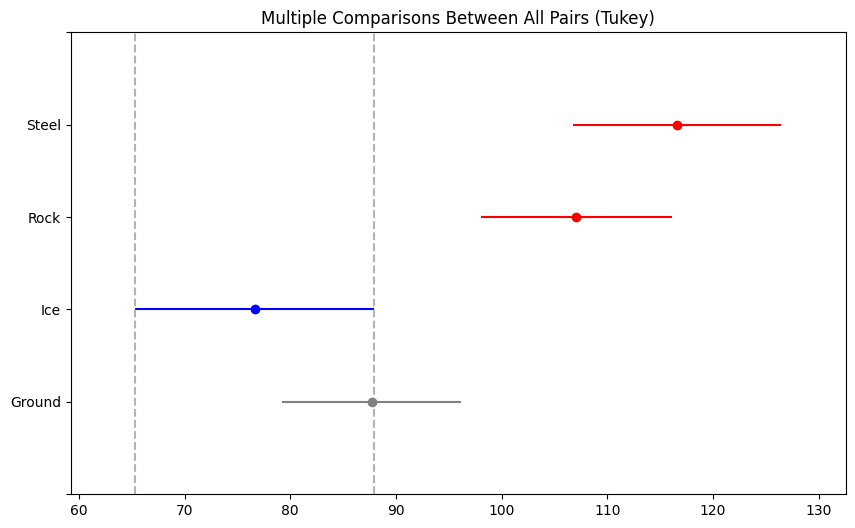

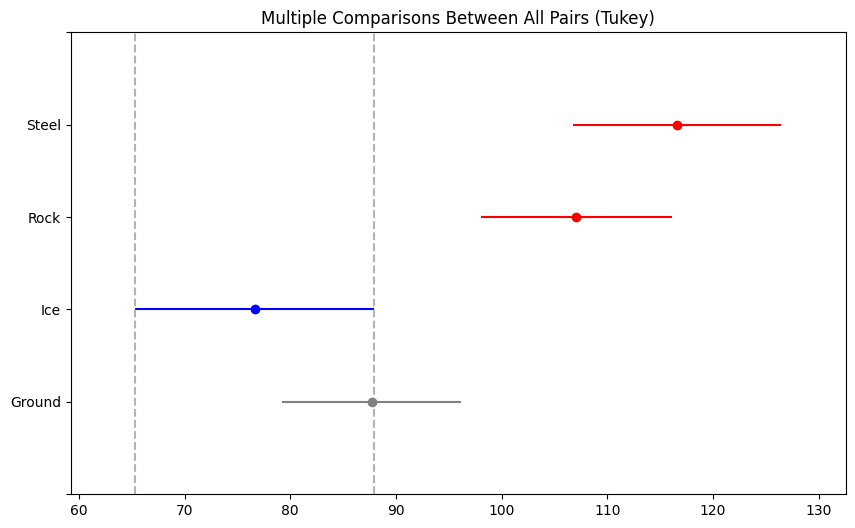

In [ ]:
# тест Тьюки - попарное сравнение выборок

tukey = pairwise_tukeyhsd(endog=pd.concat( [ rock['Defense'], ground['Defense'], steel['Defense'], ice['Defense'] ]).values,
                          groups=lst_kind,
                          alpha=0.05)
print(tukey)

tukey.plot_simultaneous(comparison_name="Ice")

Вывод:
- Дисперсионный анализ: характеристики защиты у выбранных классов различны, средние значения четырех групп не равны.
- Тест Тьюки: показатели защиты у покемонов классов Rock и Steel схожи (средние значения значимо не различаются, p-value=0.56), также у классов Ground и Ice (p-value=0.47). Но показатели защиты класов Rock, Steel отличны от классов Ground, Ice.